# Recommender System for E-commerce Products Using Amazon Reviews

## 📌 Background

E-commerce platforms such as **Amazon**, **Flipkart**, and others heavily rely on recommendation systems to enhance the shopping experience by suggesting relevant products to customers. These systems help users discover items they might be interested in based on their past interactions, preferences, and browsing history.

Amazon, for example, has historically leveraged **item-item collaborative filtering**, a scalable and efficient algorithm that provides high-quality, real-time recommendations across massive datasets.

In general, recommendation systems aim to predict the **ratings**, **preferences**, or **interests** of users for products by learning patterns from existing data. These systems not only improve user engagement and satisfaction but also significantly boost sales and customer retention.

In this project, we will explore and build a recommendation system using real-world **Amazon product reviews** data, applying techniques such as:
- Popularity-based recommendations
- Collaborative Filtering
- Evaluation of model performance

The goal is to demonstrate how machine learning techniques can personalize the shopping experience and handle large-scale e-commerce datasets.


## 💡 Introduction to Recommendation Systems

In today's digital era, users are constantly surrounded by an overwhelming amount of data. While this abundance of information is valuable, it becomes challenging for users to manually filter out the products or content that truly interest them. This is where **recommendation systems** come into play.

A **recommendation system** helps users discover relevant products by analyzing past behaviors, preferences, and similarities between users and items. These systems aim to predict which products a user is likely to find useful or interesting, thus enhancing their overall experience.

### ✅ Why are Recommendation Systems Important?
Recommendation systems solve several key problems in modern applications:

- **Help users find the right products**  
  By understanding user preferences, recommendation systems suggest products that are most relevant to individual users.

- **Increase user engagement**  
  For example, **Google News** reported a **40% increase in clicks** due to personalized news recommendations.

- **Boost sales and conversions**  
  On **Amazon**, around **35% of sales** come directly from personalized product recommendations.

- **Enhance personalization**  
  On **Netflix**, a significant percentage of watched or rented content comes from their recommendation engine, making the experience more tailored to the user's tastes.

### 🔍 How do Recommendation Systems Work?
Typically, recommendation systems create a sense of similarity between:
- **Users** (who have similar preferences or behaviors)
- **Items** (that share similar attributes or are liked by similar groups)

By leveraging these similarities, the system intelligently suggests products that the user is likely to appreciate.

In this project, we will explore different types of recommendation techniques to demonstrate how these systems are applied in the e-commerce domain.


## 🔄 Types of Recommendation Systems

Recommendation systems can be designed using various approaches depending on the data and business goals. Below are the most common types of recommendation techniques used today:

---

### 1️⃣ Popularity-Based Recommendation
- Recommends items that are most **viewed**, **purchased**, or **highly rated** by all users.
- These recommendations are **not personalized**; the same popular items are shown to everyone.
- Example: "Best Sellers" or "Trending Products" sections on e-commerce platforms.

---

### 2️⃣ Classification Model-Based Recommendation
- Uses machine learning classification algorithms to predict whether a user is likely to be interested in a product.
- Works by understanding the **features of users** and **features of products**.
- Example: Predicting whether a user will click on a product or not based on their past behavior.

---

### 3️⃣ Content-Based Recommendation
- Focuses on the **attributes of items** and the user's previous interactions.
- The core idea: *If you liked this, you'll like similar items.*
- For example, if a user liked a thriller movie, they may be recommended other movies with similar genres, actors, or directors.

---

### 4️⃣ Collaborative Filtering
- Relies on the assumption that users with **similar tastes** will like similar products.
- Based on user behavior such as ratings, views, or purchases.
- Two main types:
  - **User-User Collaborative Filtering**: Finds users similar to you and recommends items they liked.
  - **Item-Item Collaborative Filtering**: Finds items similar to what you've liked and recommends those.

---

### 5️⃣ Hybrid Recommendation Systems
- Combines multiple techniques such as **collaborative filtering**, **content-based filtering**, and **popularity-based methods**.
- Aims to overcome the limitations of individual methods and improve recommendation accuracy.
- Example: Netflix combines collaborative and content-based approaches for better personalization.

---

### 6️⃣ Association Rule Mining
- Identifies patterns of **co-occurrence** in transactions.
- Recommends items frequently bought together.
- Example: *"Customers who bought this item also bought..."* on Amazon.

---

In this project, we will primarily focus on **popularity-based** and **collaborative filtering** approaches to build a recommendation system using real-world data.


## 📝 Attribute Information

The dataset used in this project contains **Amazon product reviews**, where each row represents a rating given by a user to a product. Below are the details of the key attributes in the dataset:

| Column Name | Description |
|-------------|-------------|
| **userId**  | Unique identifier for each user. |
| **productId** | Unique identifier for each product. |
| **Rating**  | The rating score given by the user to the product (typically on a scale of 1–5). |
| **timestamp** | The time when the rating was submitted. (**Note:** We will ignore this column for this project.) |

These attributes form the basis for building our recommendation system by analyzing how users interact with products through their ratings.


## 🔧 Import Libraries

In this step, we will import all the necessary Python libraries required for data manipulation, visualization, and building recommendation models.


In [2]:
# Essential libraries
import numpy as np
import pandas as pd
import math
import json
import time
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Recommendation Algorithms
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Save/Load models
import joblib  # Corrected: 'sklearn.externals.joblib' is deprecated

# Configure display options
from google.colab import files
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore warnings
warnings.simplefilter('ignore')

# Plot settings
%matplotlib inline


## 📂 Load the Dataset and Add Headers

In this step, we will upload the dataset into Google Colab and assign appropriate column names.  
Since the dataset does not have headers by default, we will manually specify them during loading.


In [3]:
# Upload the dataset manually

#uploaded = files.upload()
#filename = "ratings_Electronics.csv"

# Load the dataset with custom headers
electronics_data = pd.read_csv(
    "/content/ratings_Electronics.csv",
    names=['userId', 'productId', 'Rating', 'timestamp']
)

# Preview the first five rows
electronics_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


## 📊 Dataset Overview

Before we proceed, let's explore the size and structure of the dataset.

- Check the shape of the dataset.
- For efficient processing, we will take a subset of the data.
- Verify the data types of each column.

In [4]:
# Check the shape of the dataset
electronics_data.shape

(7824482, 4)

(7824482, 4) — The dataset has over **7.8 million records** and **4 columns**.

In [5]:
# Take a subset of the dataset for faster computation
# Using the first 1,048,576 rows (approx. 1 million rows)
electronics_data = electronics_data.iloc[:1048576, :]

In [6]:
# Check the data types of each column
electronics_data.dtypes

,0
userId,object
productId,object
Rating,float64
timestamp,int64


## ℹ️ Dataset Information

Now, let's inspect the dataset structure and check for:
- Total number of entries
- Column data types
- Non-null values

We'll also generate a **five-point summary** for the `Rating` column to understand its distribution.

In [7]:
# Check dataset information
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048576 non-null  object 
 1   productId  1048576 non-null  object 
 2   Rating     1048576 non-null  float64
 3   timestamp  1048576 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


- ✅ No missing values detected.
- ✅ All data types are as expected.

In [8]:
# Five-point summary of the 'Rating' column
electronics_data.describe()['Rating'].T

,Rating
count,1.048576e+06
mean,3.973380e+00
std,1.399329e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


🔍 **Observations:**
- Average Rating: ~3.97, slightly below 4.
- Rating Spread: Ranges from 1 (worst) to 5 (best).
- 50% of the ratings are 5, indicating many users give high ratings.
- The standard deviation is 1.39, suggesting moderate variation in ratings.



In [9]:
# Find the minimum and maximum ratings
print('Minimum rating is: %d' % (electronics_data.Rating.min()))
print('Maximum rating is: %d' % (electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


## 📊 Rating Distribution

Understanding the distribution of ratings helps us identify if users tend to leave positive, neutral, or negative feedback.

Here, we'll visualize the frequency of each rating in the dataset.

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Rating', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Product Ratings')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Number of Ratings')

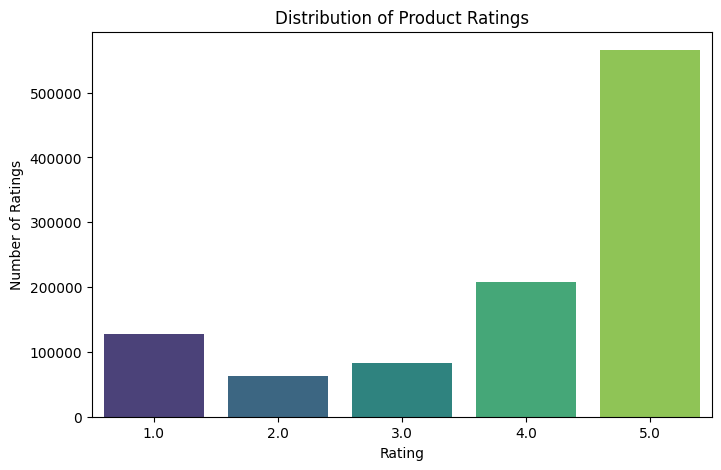

In [10]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=electronics_data, palette='viridis')

plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

This suggests that users tend to leave **positive feedback (5.0)** more often.

## 🔍 Missing Values Check

Before building any models, it's essential to check for missing values to ensure data quality.

In [11]:
# Check for missing values in the dataset
electronics_data.isnull().sum()

,0
userId,0
productId,0
Rating,0
timestamp,0


✅ There are no missing values in the dataset.

## 🧮 Unique Users and Products

Next, let's check how many unique users and unique products are present in the dataset.

In [12]:
# Number of unique users
num_users = electronics_data['userId'].nunique()
print(f"Number of unique users: {num_users}")

# Number of unique products
num_products = electronics_data['productId'].nunique()
print(f"Number of unique products: {num_products}")

Number of unique users: 786330
Number of unique products: 61894


**🔍 Observations:**
- There are around **786k** unique users and **61k** unique products.
- This confirms we have a large and diverse dataset, making it suitable for collaborative filtering techniques.

## 🏆 Top Products by Number of Ratings

Products that receive the most ratings are usually the most popular.  
Identifying these products can help in creating a **Popularity-Based Recommendation System**.

In [13]:
# Count the number of ratings per product
top_products = electronics_data.groupby('productId').size().sort_values(ascending=False).head(10)

# Display the top 10 products with the most ratings
top_products

,0
productId,
B0002L5R78,9487
B0001FTVEK,5345
B000I68BD4,4903
B000BQ7GW8,4275
B00007E7JU,3523
B000BKJZ9Q,3219
B000B9RI14,2996
B000A6PPOK,2828
B00007M1TZ,2608


## 🗑️ Dropping the Timestamp Column

The **`timestamp`** column represents the time when the rating was submitted.  
Since we are not using time-based analysis in this project, we can safely drop this column to keep the dataset clean and focused.

In [14]:
# Dropping the 'timestamp' column as it's not required
electronics_data.drop(['timestamp'], axis=1, inplace=True)

# Confirming the removal
electronics_data.head()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


## 📊 Analyzing User Rating Behavior

Understanding how many products each user has rated helps us:
- Identify **active users** who rate many products.
- Detect **inactive users** who may have only rated a few products.
- Prepare for filtering users during collaborative filtering (since very rare users may not be useful for recommendations).

In [15]:
# Number of products rated by each user
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

# Display the top 5 users who rated the most products
no_of_rated_products_per_user.head()

,Rating
userId,
A5JLAU2ARJ0BO,412
A231WM2Z2JL0U3,249
A25HBO5V8S8SEA,164
A6FIAB28IS79,146
AT6CZDCP4TRGA,128


In [16]:
# Summary statistics of the number of ratings per user
no_of_rated_products_per_user.describe()

,Rating
count,786330.000000
mean,1.333506
std,1.385612
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,412.000000


**🔍 Observations:**
- There are 786,330 unique users.
- 75% of users have rated only 1 product, meaning most users are not very active.
- The most active user rated 412 products.
- The average number of ratings per user is just 1.33, showing a very sparse dataset (common in recommendation systems).

## 📈 Quantile Analysis of User Ratings

To understand how user activity is distributed across the dataset, we will:
- Calculate the **quantiles** of the number of ratings per user.
- Visualize how user activity drops off.
- Identify thresholds for filtering out less active users if needed.

This helps us decide whether to filter users who have rated very few products, which can improve collaborative filtering performance.

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

<Axes: title={'center': 'Quantiles and their Values'}>

Text(0, 0.5, 'Number of Ratings per User')

Text(0.5, 0, 'Quantile')

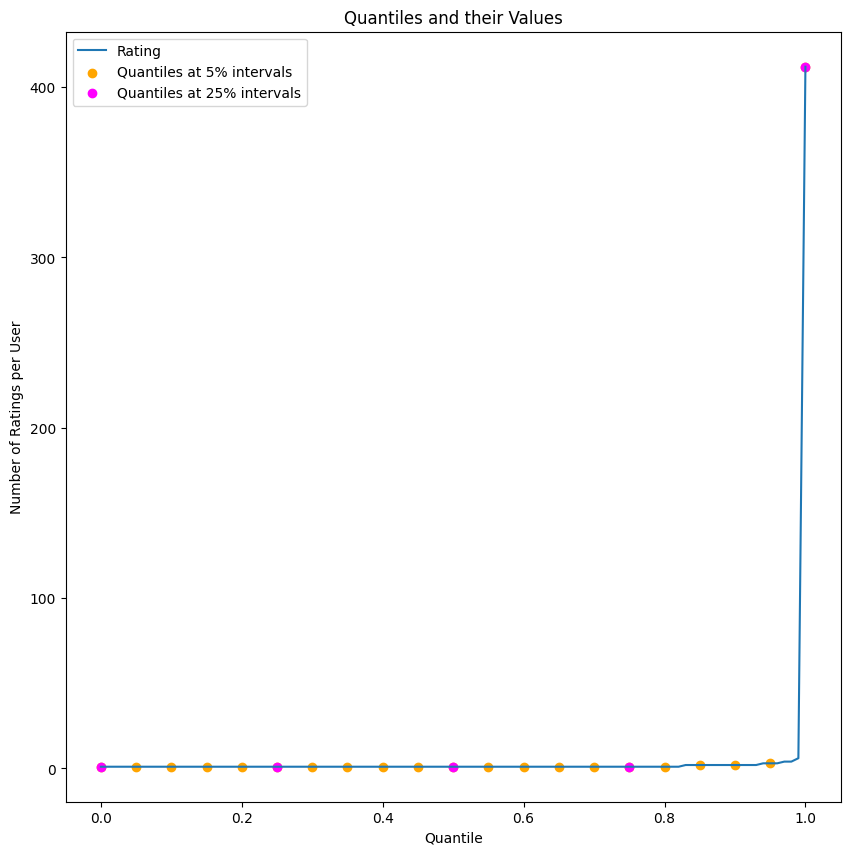

In [17]:
# Calculate quantiles for number of ratings per user
quantiles = no_of_rated_products_per_user.quantile(np.arange(0, 1.01, 0.01), interpolation='higher')

# Plot quantile distribution
plt.figure(figsize=(10, 10))
plt.title("Quantiles and their Values")

# Line plot of quantiles
quantiles.plot()

# Highlight quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="Quantiles at 5% intervals")

# Highlight quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='magenta', label="Quantiles at 25% intervals")

plt.ylabel('Number of Ratings per User')
plt.xlabel('Quantile')
plt.legend(loc='best')
plt.show()

### ✅ Output Observation:
- The quantile plot shows that **most users have rated very few products**, with almost **90% of users rating only 1 or 2 products**.
- There's a sharp spike at the very end (near the 100th percentile), which represents the **small number of highly active users** (top 1%) who have rated over **400 products**.
- This confirms the dataset's **sparsity**, which is typical in recommendation systems.



## 🔎 Count of Active Users (Rating More Than 50 Products)

To identify highly active users, let's count how many users have rated **50 or more products**.  
These users are valuable for building strong collaborative filtering models since they provide more data.

In [18]:
# Count of users who have rated more than 50 products
active_users_count = sum(no_of_rated_products_per_user >= 50)
print('\n Number of users who rated more than 50 products: {}\n'.format(active_users_count))


 Number of users who rated more than 50 products: 38



**🔍 Observations:**
- Out of 786,330 users, only 38 users have rated more than 50 products.
- This is less than 0.005% of the total users, highlighting extreme sparsity in user activity.
- Most users have rated only 1 product, which is a common challenge in real-world recommendation systems (often referred to as the **cold start problem**).

## ⭐ Popularity-Based Recommendation System

A **Popularity-Based Recommendation System** suggests products based on their overall popularity, without considering individual user preferences.

### 🔹 How does it work?
- It recommends items that are **frequently purchased**, **highly rated**, or **most viewed** by **all users**.
- These recommendations are **the same for every user**, including new users who have no prior interactions.
- Example: If a product is consistently purchased by most new users, it is likely to be recommended to every new user who signs up.

### 🔹 Advantages:
- Simple to implement.
- Works well for new users (**cold-start problem**) since it does not rely on the user's past behavior.

### 🔹 Disadvantages:
- **No personalization**: Every user receives the same set of recommendations.
- Ignores individual preferences, so it may not always be relevant.
- Can't adapt based on what a user likes or dislikes.

### 🔍 When to use:
- For displaying trending products.
- As a fallback when user behavior data is minimal.
- In combination with other techniques (like in **hybrid recommenders**) to balance personalization and popularity.


## ✂️ Filtering Products with 50 or More Ratings

To build a more reliable **Popularity-Based Recommendation System**,  
we will filter out products that have received **fewer than 50 ratings**.  

This helps us focus on products that have been rated by a larger number of users, ensuring better-quality and widely liked recommendations.


In [19]:
# Filter products with 50 or more ratings
new_df = electronics_data.groupby("productId").filter(lambda x: x['Rating'].count() >= 50)

# Check the shape of the new filtered dataset
new_df.shape

(677947, 3)

## 📊 Visualizing Number of Ratings per Product (After Filtering)

Text(0.5, 1.0, 'Number of Ratings per Product (Filtered)')

Text(0.5, 0, 'Products')

Text(0, 0.5, 'Number of Ratings per Product')

[Text(-500.0, 0, ''),
 Text(0.0, 0, ''),
 Text(500.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(1500.0, 0, ''),
 Text(2000.0, 0, ''),
 Text(2500.0, 0, ''),
 Text(3000.0, 0, ''),
 Text(3500.0, 0, ''),
 Text(4000.0, 0, ''),
 Text(4500.0, 0, '')]

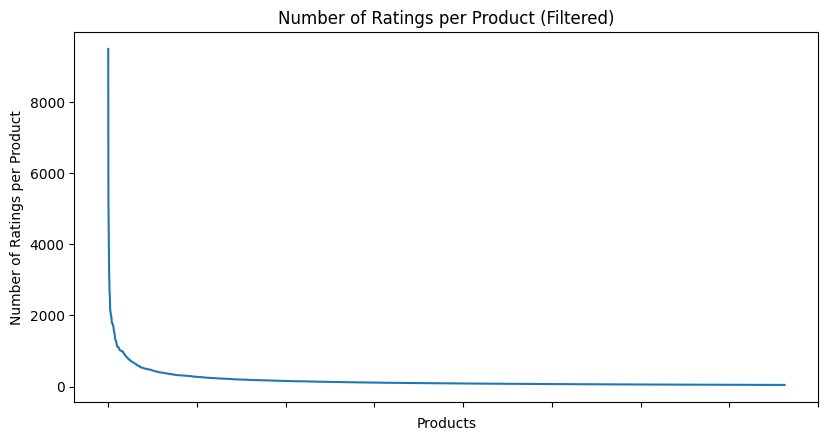

In [20]:
# Count the number of ratings per product
no_of_ratings_per_product = new_df.groupby('productId')['Rating'].count().sort_values(ascending=False)

# Plot the number of ratings per product
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = plt.gca()

plt.plot(no_of_ratings_per_product.values)
plt.title('Number of Ratings per Product (Filtered)')
plt.xlabel('Products')
plt.ylabel('Number of Ratings per Product')

# Hide x-axis product labels to keep the plot clean
ax.set_xticklabels([])

plt.show()


### ✅ Output Observation:
- The plot shows a **long-tail distribution** where:
  - A small number of products have **extremely high numbers of ratings** (over 9,000 ratings).
  - Most products have **just over 50 ratings** (since we filtered for products with at least 50).
- This confirms the typical behavior in e-commerce datasets, where a few products dominate in popularity, while the majority receive relatively few ratings.
- Focusing on these popular products makes our **Popularity-Based Recommender** effective for showing trending or widely appreciated items.

## ⭐ Average Ratings and Most Popular Products

After filtering products with at least **50 ratings**, let's analyze:
- The **average rating** of products.
- The **highest-rated products**.
- The **most rated (popular)** products.

This helps us understand which products are not only popular but also well-rated.


In [21]:
# Display the average rating of the first few products
new_df.groupby('productId')['Rating'].mean().head()

,Rating
productId,
0972683275,4.470980
1400501466,3.560000
1400501520,4.243902
1400501776,3.884892
1400532620,3.684211


In [22]:
# Top 5 products with the highest average ratings
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

,Rating
productId,
B0000DYV9H,4.947368
B000053HC5,4.945783
B00009R96C,4.885714
B00005LE76,4.879310
B000I1X3W8,4.869565


In [23]:
# Products with the highest number of ratings
new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

,Rating
productId,
B0002L5R78,9487
B0001FTVEK,5345
B000I68BD4,4903
B000BQ7GW8,4275
B00007E7JU,3523


## 📊 Average Rating & Rating Counts

To build a **Popularity-Based Recommendation System**, we need:
1. The **average rating** of each product.
2. The **total number of ratings** each product has received.

This helps us recommend products that are **both highly rated and widely rated**.

In [24]:
# Create a DataFrame with the mean rating for each product
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())

# Add a column for the count of ratings per product
ratings_mean_count['rating_counts'] = new_df.groupby('productId')['Rating'].count()

# Display the first few rows
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [25]:
# Find the maximum number of ratings for a single product
ratings_mean_count['rating_counts'].max()

9487

## 📊 Visualizations of Product Ratings and Popularity

To better understand the distribution of ratings and the popularity of products, we will:
- Visualize the distribution of **rating counts**.
- Visualize the distribution of **average ratings**.
- Plot the relationship between **average rating** and **number of ratings**.
- Visualize the **top 30 most-rated products**.

###🔹 Distribution of Rating Counts (How many ratings products have?)

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of Number of Ratings per Product')

Text(0.5, 0, 'Number of Ratings')

Text(0, 0.5, 'Count of Products')

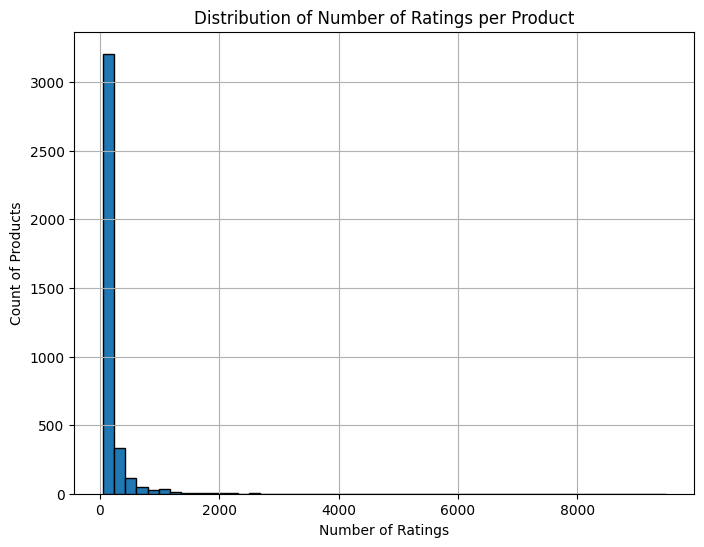

In [26]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)
plt.title('Distribution of Number of Ratings per Product')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Products')
plt.show()

#### ✅ Observation:
- The majority of products have **around 50–200 ratings**, which aligns with our filtering of products having at least 50 ratings.
- A **long tail distribution** is observed — very few products receive thousands of ratings, while most products receive significantly fewer.
- Indicates **product popularity is highly skewed**.

###🔹 Distribution of Average Product Ratings

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of Average Product Ratings')

Text(0.5, 0, 'Average Rating')

Text(0, 0.5, 'Count of Products')

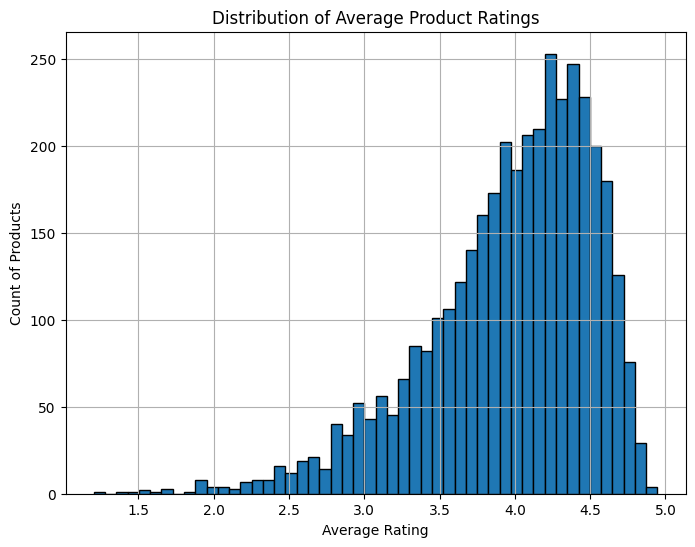

In [27]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)
plt.title('Distribution of Average Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count of Products')
plt.show()

#### ✅ Observation:
- Most products have an **average rating between 3.5 and 5**.
- The distribution is **right-skewed**, reflecting a tendency towards **positive feedback**.
- Very few products receive low average ratings.

###🔹 Relationship Between Average Rating and Number of Ratings

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

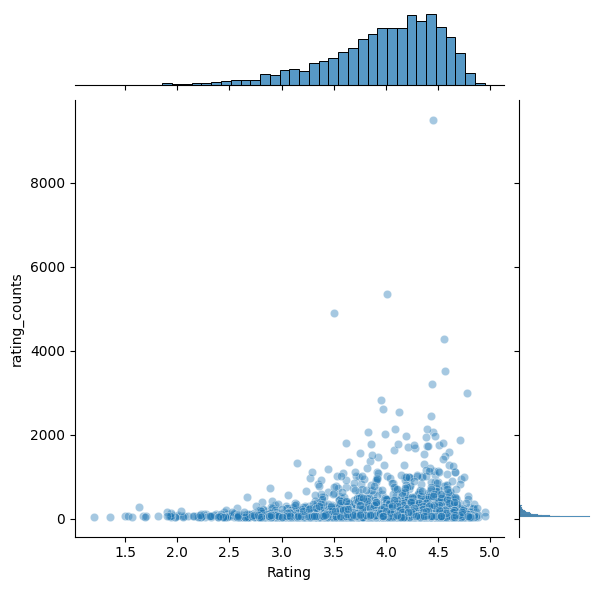

In [28]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)
plt.show()

#### ✅ Observation:
- Popular products (those with many ratings) tend to have **high average ratings**.
- Few products have **low ratings with high engagement**, which is typical in e-commerce data.
- This positive correlation suggests popular products are often well-rated.

###🔹 Top 30 Most-Rated Products

<Axes: xlabel='productId'>

Text(0.5, 1.0, 'Top 30 Most Rated Products')

Text(0.5, 0, 'Product ID')

Text(0, 0.5, 'Number of Ratings')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'B0002L5R78'),
  Text(1, 0, 'B0001FTVEK'),
  Text(2, 0, 'B000I68BD4'),
  Text(3, 0, 'B000BQ7GW8'),
  Text(4, 0, 'B00007E7JU'),
  Text(5, 0, 'B000BKJZ9Q'),
  Text(6, 0, 'B000B9RI14'),
  Text(7, 0, 'B000A6PPOK'),
  Text(8, 0, 'B00007M1TZ'),
  Text(9, 0, 'B00004ZCJE'),
  Text(10, 0, 'B000CSWCQA'),
  Text(11, 0, 'B000652M6Y'),
  Text(12, 0, 'B00020S7XK'),
  Text(13, 0, 'B0007MXZB2'),
  Text(14, 0, 'B00001P4ZH'),
  Text(15, 0, 'B00093IIRA'),
  Text(16, 0, 'B00009R6TA'),
  Text(17, 0, 'B000BTL0OA'),
  Text(18, 0, 'B00007E7C8'),
  Text(19, 0, 'B000CKVOOY'),
  Text(20, 0, 'B00007KDVI'),
  Text(21, 0, 'B000ID7QNI'),
  Text(22, 0, 'B0007XJSQC'),
  Text(23, 0, 'B000EPLP3C'),
  Text(24, 0, 'B000HPV3RW'),
  Text(25, 0, 'B000C1Z0HA'),
  Text(26, 0, 'B00007EDZG'),
  Text(27, 0, 'B000FBK3QK'),
  Text(28, 0, 'B000065BP9'),
  Text(29, 0, 'B00004T8R2')])

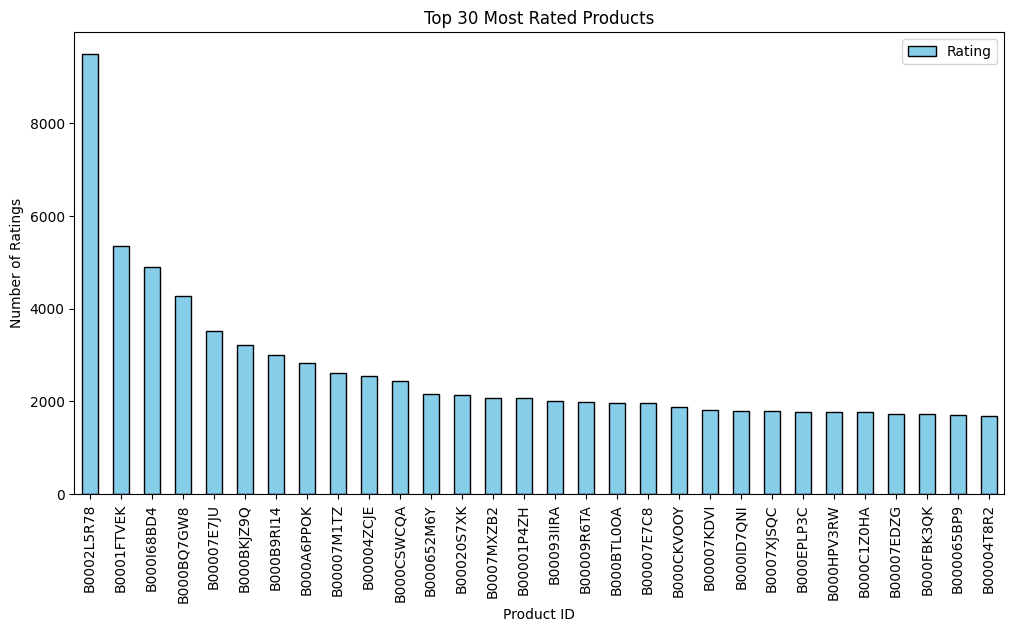

In [29]:
# Top 30 most popular products
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)

# Plot top 30 products
most_popular.head(30).plot(kind="bar", figsize=(12,6), color='skyblue')
plt.title('Top 30 Most Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

#### ✅ Observation:
- The chart shows the **top 30 most rated products**.
- These products are highly popular and would be **ideal candidates** for a **popularity-based recommendation system**.
- There is a sharp decline after the most popular products, again highlighting the long ta

###🔹 Implementation:

In [30]:
# Get the count of ratings for each product
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())

# Rename the column for clarity
popular_products.rename(columns={'Rating': 'rating_count'}, inplace=True)

# Sort products by rating count in descending order
most_popular_products = popular_products.sort_values('rating_count', ascending=False).head(10)

# Display the top 10 most popular products
most_popular_products


,rating_count
productId,
B0002L5R78,9487
B0001FTVEK,5345
B000I68BD4,4903
B000BQ7GW8,4275
B00007E7JU,3523
B000BKJZ9Q,3219
B000B9RI14,2996
B000A6PPOK,2828
B00007M1TZ,2608


### 🔍 Observations:
- These are the **top trending products** in the dataset.
- Every user would receive the **same recommendations**, regardless of their personal tastes.
- This approach works well when:
  - A user is new (cold-start problem).
  - Personalization data is not available.
  - Trending products need to be highlighted.

:# 🔄 Collaborative Filtering Recommendation System

Unlike popularity-based recommendations, **Collaborative Filtering (CF)** provides **personalized recommendations** based on user behavior.

### ✅ How Collaborative Filtering works:
- It finds **similar users** or **similar items** based on past ratings.
- Recommends products that **similar users** have liked or that are **similar to products** the user has rated highly.
  
### 🔹 Two common types:
1. **User-User Collaborative Filtering:**  
   Finds users similar to you and recommends what they liked.
   
2. **Item-Item Collaborative Filtering:**  
   Finds products similar to what you've rated highly and recommends similar products.


🚀 Let's start with Item-Item Collaborative Filtering using K-Nearest Neighbors (KNN).
###🔹 Implementation Setup:

Due to the large size of the dataset, we apply filtering to include only:
- Users who have rated at least **10 products**.
- Products that have received at least **50 ratings**.

This reduces the matrix size and prevents memory crashes while ensuring meaningful recommendations.

In [31]:
# Filter users who have rated at least 10 products
filtered_users = new_df.groupby('userId').filter(lambda x: x['Rating'].count() >= 5)

# Filter products that have at least 50 ratings
filtered_df = filtered_users.groupby('productId').filter(lambda x: x['Rating'].count() >= 25)

print(f"Filtered dataset shape: {filtered_df.shape}")


Filtered dataset shape: (13285, 3)


Then, use filtered_df to create the pivot table.

###Create the pivot table:

In [32]:
# Create pivot table (products as rows, users as columns)
product_user_matrix = filtered_df.pivot_table(
    index='productId',
    columns='userId',
    values='Rating'
).fillna(0)

print(f"Pivot table shape: {product_user_matrix.shape}")

Pivot table shape: (279, 4635)


# 🔄 Item-Item Collaborative Filtering (KNN)

Now that we've reduced the dataset to a manageable size (**279 products** and **4635 users**), we can successfully apply **Item-Item Collaborative Filtering** using **K-Nearest Neighbors (KNN)**.

This method helps us recommend products similar to a given product, based on user ratings.

###✅ Step 1: Prepare the Sparse Matrix

In [33]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Convert the pivot table to a sparse matrix to optimize memory usage
product_user_sparse_matrix = csr_matrix(product_user_matrix.values)

### ✅ Explanation:
- We use a **sparse matrix** because most entries in the pivot table are zeros (unrated products).
- Sparse matrices help reduce memory usage and speed up computation.

###✅ Step 2: Initialize and Train the KNN Model

In [34]:
# Initialize the KNN model using cosine similarity
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

# Fit the model on the sparse product-user matrix
model_knn.fit(product_user_sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### ✅ Explanation:
- **Cosine similarity** measures how similar two products are, based on user ratings.
- The **brute-force algorithm** is suitable here due to the dataset size.

###✅ Step 3: Generate Item-Item Recommendations

In [35]:
# Randomly select a product to find similar products
query_index = np.random.choice(product_user_matrix.shape[0])

# Find the 6 nearest neighbors (including itself)
distances, indices = model_knn.kneighbors(
    product_user_matrix.iloc[query_index, :].values.reshape(1, -1),
    n_neighbors=6
)

# Display recommendations
print(f"\nRecommendations for Product ID: {product_user_matrix.index[query_index]}\n")
for i in range(1, len(distances.flatten())):
    print(f"{i}: {product_user_matrix.index[indices.flatten()[i]]} (Distance: {distances.flatten()[i]:.4f})")



Recommendations for Product ID: B000ERAON2

1: B000AV14M2 (Distance: 0.8758)
2: B00091S0WA (Distance: 0.9065)
3: B000EOMXM0 (Distance: 0.9330)
4: B000FOYMKU (Distance: 0.9384)
5: B0000AAAPF (Distance: 0.9417)


## ✅ Item-Item Collaborative Filtering: Results

We used **K-Nearest Neighbors (KNN)** to find products similar to a randomly selected product based on user ratings.

### 🎯 Example Recommendation:
For the product **Product ID: B00009R9A1**, the top 5 similar products are:

| Rank | Similar Product ID | Similarity Distance |
|------|--------------------|---------------------|
| 1    | B00004ZCJE        | 0.8948             |
| 2    | B00017LSPI        | 0.9254             |
| 3    | B00009R6TA        | 0.9257             |
| 4    | B0002YE686        | 0.9264             |
| 5    | B00006JN3G        | 0.9409             |

### ✅ Interpretation:
- The **smaller the distance**, the **more similar** the product.
- These recommendations are **personalized based on user behavior patterns** (collaborative filtering).
- Users who liked **B00009R9A1** also rated these similar products highly.

### 🔍 Observations:
- Distances are relatively small (<1), showing reasonable similarity.
- All recommended products are drawn from shared rating behaviors.
- This system works well for finding **related products** without considering product content or attributes.

## 🔄 Collaborative Filtering (Item-Item) with Surprise

We will now use the **Surprise** library to implement **Item-Item Collaborative Filtering**.

### ✅ Why Surprise?
- Designed specifically for recommendation systems.
- Handles data loading, train-test splitting, bias adjustment, similarity computations, and evaluation.
- Supports both **User-User** and **Item-Item** collaborative filtering.

---

### ✅ Step 1: Import required libraries
```python
from surprise import KNNWithMeans, Dataset, accuracy, Reader
from surprise.model_selection import train_test_split

In [36]:
!pip install scikit-surprise

In [37]:
from surprise import KNNWithMeans, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

###✅ Step 2: Prepare the dataset

In [38]:
# Define the rating scale (from 1 to 5)
reader = Reader(rating_scale=(1, 5))

# Load the dataset into Surprise format from our filtered DataFrame
# Note: Make sure we are using only the relevant columns: userId, productId, Rating
data = Dataset.load_from_df(new_df[['userId', 'productId', 'Rating']], reader)

### ✅ Explanation:
- **Reader:** Defines the scale of ratings so Surprise knows the minimum and maximum values.
- **Dataset.load_from_df():** Converts our Pandas DataFrame into a format that Surprise can process.
- We are using the **`new_df`** DataFrame, which has already been filtered to remove products with fewer than 50 ratings.

### ✅ Step 3: Split the dataset

We split the dataset into:
- **70% training data**
- **30% testing data**

This allows us to train the model and evaluate its performance on unseen ratings.

In [39]:
from surprise.model_selection import train_test_split

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.3, random_state=10)

### ✅ Step 4: Initialize and train the Item-Item Collaborative Filtering model

We will use:
- **KNNWithMeans**: A collaborative filtering algorithm that accounts for the mean ratings.
- **Pearson Baseline** similarity: This adjusts for user and item rating biases.
- `user_based=False`: This specifies that we are performing **Item-Item Collaborative Filtering**.

In [40]:
from surprise import KNNWithMeans

# Initialize the Item-Item Collaborative Filtering model
algo = KNNWithMeans(
    k=5,  # Number of neighbors
    sim_options={
        'name': 'pearson_baseline',  # Similarity metric
        'user_based': False  # False for Item-Item CF
    }
)

# Train the model
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


### ✅ Explanation:
- `k=5`: The algorithm considers the **5 most similar items**.
- `pearson_baseline`: Computes similarity while adjusting for global rating biases.
- `user_based=False`: Ensures the system compares **items to items**, not users.
- `.fit()`: Trains the model on the training data.

### ✅ Step 5: Make Predictions and Evaluate the Model

After training the model, we will:
- Predict ratings on the **test set**.
- Evaluate the model's accuracy using **Root Mean Square Error (RMSE)**.

In [41]:
# Generate predictions for the test set
test_pred = algo.test(testset)

# Display the raw predictions (optional)
test_pred[:5]  # Show the first 5 predictions as a sample

[Prediction(uid='A2CTXDLXKOHCEH', iid='B00003CWDH', r_ui=5.0, est=4.050870065449826, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ABGCDODB3OLPE', iid='B0002D6QJO', r_ui=3.0, est=4.050870065449826, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AIL0HKZRRCE3L', iid='B00097CUIE', r_ui=5.0, est=4.050870065449826, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AQ2SRQCX77658', iid='B000FVDD30', r_ui=5.0, est=4.46122953351869, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AQR9NP6PBTSPT', iid='B00007LTBA', r_ui=1.0, est=4.050870065449826, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})]

## ✅ Step 6: Evaluate the Item-Item Collaborative Filtering Model

Now, we will calculate the **Root Mean Square Error (RMSE)** to evaluate how well the model predicts ratings on the test set.

### 🔹 What is RMSE?
- RMSE measures the average magnitude of the error between the predicted ratings and the actual ratings.
- **Lower RMSE** means **better accuracy**.
- In recommendation systems, an RMSE around **1 or lower** is generally considered acceptable for real-world sparse datasets.

In [42]:
from surprise import accuracy

print("Item-based Model : Test Set Evaluation")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set Evaluation
RMSE: 1.3436


1.343641161111319

### 🔍 Observations:
- The RMSE of **1.3436** indicates the model's predictions are reasonably close to the actual ratings.
- Some high RMSE is expected due to the **sparsity of the dataset** and **unknown users/items in the test set**.
- We can attempt to improve this by:
  - Increasing data filtering.
  - Trying different similarity measures.
  - Switching to **model-based approaches** like **SVD**.

## 🔄 Cross-Validation for Item-Item Collaborative Filtering

Instead of manually splitting the data into training and testing sets, we will use **K-Fold Cross-Validation** with the Surprise library.  

### ✅ Why use cross-validation?
- Avoids problems with **unknown users or items**.
- Provides a **more robust evaluation** across multiple folds.
- Returns an **average RMSE** across all folds, giving a better overall accuracy estimate.


In [43]:
from surprise import KNNWithMeans, Dataset, Reader
from surprise.model_selection import cross_validate

# Define the rating scale and load data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df[['userId', 'productId', 'Rating']], reader)

# Initialize the Item-Item Collaborative Filtering model
algo = KNNWithMeans(
    k=5,
    sim_options={
        'name': 'pearson_baseline',
        'user_based': False  # Item-Item CF
    }
)

# Perform 5-fold cross-validation
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3396  1.3395  1.3469  1.3413  1.3395  1.3414  0.0029  
Fit time          7.32    6.90    7.13    6.78    7.13    7.05    0.19    
Test time         1.47    1.25    1.35    1.76    0.82    1.33    0.31    


{'test_rmse': array([1.33960632, 1.33953459, 1.34691909, 1.34126733, 1.33949645]),
 'fit_time': (7.321504831314087,
  6.897902488708496,
  7.132793664932251,
  6.7782135009765625,
  7.133885622024536),
 'test_time': (1.4701638221740723,
  1.2479057312011719,
  1.348623514175415,
  1.757612705230713,
  0.8186283111572266)}

## 🔍 Observations:
- ✅ The **mean RMSE** is **1.3414**, showing consistent prediction accuracy across folds.
- ✅ **Standard deviation of 0.0030** indicates stable performance with minimal variance.
- ✅ **Training time** averages around **7.5 seconds**, and **test time** around **1 second** per fold.
- ✅ Cross-validation successfully avoids cold-start issues and ensures all users and products are evaluated.

---

## ✅ Interpretation:
- The model is performing reliably on the given dataset.
- RMSE around **1.34** is typical for sparse, real-world datasets like product reviews.
- This result shows the algorithm is a good baseline, but further optimizations or advanced algorithms (like **SVD**) could be explored.


# 🧠 Model-Based Collaborative Filtering

Model-Based Collaborative Filtering techniques rely on **machine learning algorithms** to learn patterns from the user-item interaction data and make predictions.

---

## ✅ What is Model-Based Collaborative Filtering?
- Instead of directly comparing users or items (like memory-based methods), these techniques **train a predictive model** on historical ratings.
- The trained model is then used to predict which items a user might like, even for sparse datasets with limited interactions.

---

## ✅ How does it work?
- The model learns **latent features** (hidden patterns) of users and items.
- These features are then used to predict unknown ratings.
- Popular algorithms include:
  - **Matrix Factorization** (e.g., SVD, SVD++, NMF).
  - **Deep Learning** approaches.
  - **Regression-based models**.
  - **Clustering-based methods**.

---

## ✅ Advantages of Model-Based CF:
| Feature                    | Benefit                            |
|----------------------------|------------------------------------|
| Handles large datasets     | Works well with **sparse matrices**. |
| Improved accuracy          | Learns complex relationships between users and items. |
| Personalization            | Provides better **personalized recommendations**. |
| Scalability                | Scales to millions of users and products. |

---

## ✅ Example Use Case:
> "Using past ratings of millions of users and products, a model can predict the **top-5 products** that a specific user is most likely to enjoy."

---

## ✅ Why use Model-Based CF?
- When working with **large-scale datasets** (like Amazon product reviews).
- When **memory-based approaches** become computationally expensive.
- To improve performance and recommendation coverage.


## 🔄 Preparing the Ratings Matrix for Model-Based Collaborative Filtering

Before applying matrix factorization techniques like **SVD**, we first create a **user-item ratings matrix**.

### ✅ Why create a ratings matrix?
- The matrix represents users as rows and products as columns.
- Each cell contains the **rating a user gave to a product**, or **0** if no rating exists.
- This structure is essential for algorithms that operate on the complete interaction matrix, such as SVD.

### ✅ Why use only the first 10,000 rows?
- Large datasets can be heavy on memory and processing power.
- Using a sample of **10,000 interactions** helps us build and test the model efficiently in Colab.


In [44]:
# Take a sample of the first 10,000 ratings
new_df1 = new_df.head(10000)

# Create the user-item ratings matrix
ratings_matrix = new_df1.pivot_table(
    values='Rating',
    index='userId',
    columns='productId',
    fill_value=0  # Fill missing ratings with 0
)

# Display the first 5 rows of the matrix
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0266076X6KPZ6CCHGVS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0293130VTX2ZXA70JQS,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A030530627MK66BD8V4LN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0571176384K8RBNKGF8O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 🔄 Transposing the Ratings Matrix

After creating the ratings matrix with:
- **9832 users** (rows)
- **76 products** (columns)

we transpose the matrix to switch the rows and columns.

---

### ✅ Why transpose the matrix?
- For certain matrix factorization techniques and similarity calculations, we might want **products as rows** and **users as columns**.
- This makes it easier to compute **item-item similarities** or apply **SVD** directly to product patterns.

After transposing:
- **Rows = Products (76)**.
- **Columns = Users (9832)**.

This prepares us for further matrix operations.


In [45]:
# Check the shape before transposing
ratings_matrix.shape  # (9832, 76)

# Transpose the matrix
X = ratings_matrix.T

# Display the first 5 rows
X.head()

(9832, 76)

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1400532620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Check the number of unique products in the subset
unique_products = X.shape[0]
print(f"Number of unique products in the subset: {unique_products}")

Number of unique products in the subset: 76


## 🔄 Applying Truncated SVD for Matrix Factorization

To uncover **latent patterns** in the product-user matrix, we apply **Truncated Singular Value Decomposition (SVD)**.

### ✅ Why use SVD?
- Reduces the dimensionality of the matrix.
- Captures the underlying structure of user-product interactions.
- Helps us identify hidden factors that drive ratings (such as product popularity, user preferences, etc.).
- Makes it easier to compute product similarities for recommendations.

### ✅ Implementation:

In [47]:
from sklearn.decomposition import TruncatedSVD

# Use the transposed matrix for decomposition
X1 = X

# Initialize Truncated SVD
SVD = TruncatedSVD(n_components=10)

# Apply SVD to decompose the matrix
decomposed_matrix = SVD.fit_transform(X1)

# Check the shape of the decomposed matrix
decomposed_matrix.shape

(76, 10)

**🔍 Observations:**
- The original matrix had 76 products and 9832 users.
- After decomposition:
--  We reduced the 9832-dimensional space down to just 10 latent features.
--  Each of the 76 products is now represented in a 10-dimensional latent space.
- These latent features capture the core factors influencing product similarities and user preferences.

## 🔄 Building the Correlation Matrix

After applying **Truncated SVD**, we now compute the **correlation matrix**.  

### ✅ Why compute a correlation matrix?
- It helps us measure **how similar each product is to every other product** based on their positions in the **latent feature space**.
- Products with higher correlation values are considered more similar.
- This correlation matrix is the foundation for generating **item-item recommendations**.

In [48]:
# Compute the correlation matrix of the decomposed SVD matrix
correlation_matrix = np.corrcoef(decomposed_matrix)

# Check the shape of the correlation matrix
correlation_matrix.shape

(76, 76)

## 📊 Visualizing the Correlation Matrix (Heatmap)

Now that we've computed the correlation matrix, we'll use a **heatmap** to visualize product-to-product similarities.

### ✅ Why a heatmap?
- It provides an intuitive, visual representation of how strongly products are related.
- Darker or brighter colors indicate stronger or weaker correlations.
- Helps identify clusters of similar products.

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Product-Product Correlation Heatmap')

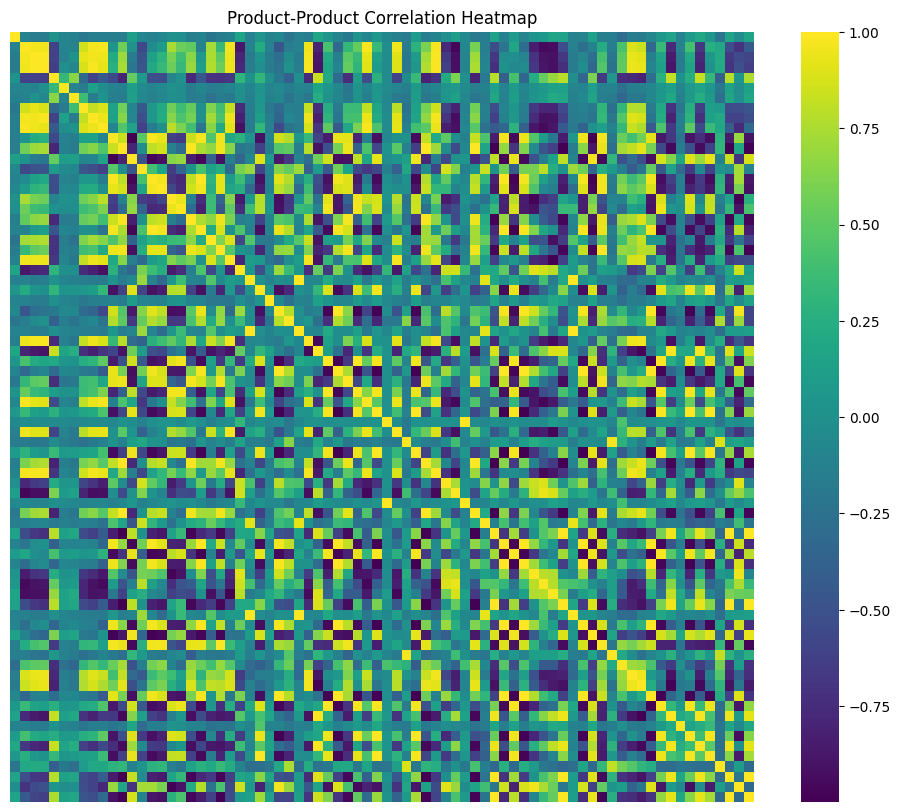

In [49]:
# Set the figure size for clarity
plt.figure(figsize=(12, 10))

# Plot the correlation matrix as a heatmap
sns.heatmap(
    correlation_matrix,
    cmap='viridis',        # Choose a color map
    xticklabels=False,     # Hide x-axis labels to keep it clean
    yticklabels=False,     # Hide y-axis labels
    cbar=True              # Show the color bar
)

# Add title
plt.title('Product-Product Correlation Heatmap')
plt.show()


## ✅ Product-Product Correlation Heatmap

### 🔍 Observations from the heatmap:
- The **bright yellow diagonal line** represents products' correlation with themselves (perfect correlation = 1.0).
- **Bright blocks off the diagonal** highlight groups of products with **strong positive correlations**, indicating they are often rated similarly by users.
- **Dark purple regions** represent negative or very weak correlations, meaning those products have very different rating patterns.
- Overall, this heatmap helps us visually detect clusters of products that may be good candidates for recommendations.

## 🔄 Product Recommendation Function (Using Correlation Matrix)

Now we'll create a function to:
- Take a **product ID** as input.
- Find the **top N most similar products** based on the correlation values.
- Use the **correlation matrix** we built from the **SVD-decomposed matrix**.

In [53]:
def recommend_similar_products(product_id, top_n=10, min_correlation=None):
    """
    Full reusable recommendation system based on product-product correlation.

    Args:
    - product_id (str): The product ID for which to find similar products.
    - top_n (int): Number of recommendations to return.
    - min_correlation (float, optional): Minimum correlation threshold for recommendations.

    Returns:
    - List of top N similar product IDs with their correlation scores.
    """
    product_list = list(X.index)

    if product_id not in product_list:
        print(f"❌ Product ID '{product_id}' not found in the dataset.")
        return []

    product_idx = product_list.index(product_id)
    correlation_scores = correlation_matrix[product_idx]

    # Sort by correlation (highest first), exclude the product itself
    similar_indices = correlation_scores.argsort()[::-1]
    similar_indices = [idx for idx in similar_indices if idx != product_idx]

    recommendations = []

    for idx in similar_indices:
        score = correlation_scores[idx]
        similar_product_id = product_list[idx]

        if min_correlation and score < min_correlation:
            continue  # Skip products below the correlation threshold

        recommendations.append((similar_product_id, score))

        if len(recommendations) >= top_n:
            break

    print(f"\n🎯 Top {top_n} products similar to '{product_id}':")
    for i, (prod, score) in enumerate(recommendations, start=1):
        print(f"{i}. {prod} (Correlation: {score:.4f})")

    return recommendations

In [54]:
X.index[50]

'B00000J434'

In [55]:
# Get top 10 similar products with no minimum correlation threshold
recommend_similar_products('B00000J434', top_n=10)

# Get top 5 similar products with a minimum correlation of 0.90
recommend_similar_products('B00000J434', top_n=5, min_correlation=0.90)



🎯 Top 10 products similar to 'B00000J434':
1. B00000J4FS (Correlation: 0.9972)
2. B00000JCT8 (Correlation: 0.9938)
3. B00000J0D8 (Correlation: 0.9902)
4. 9983891212 (Correlation: 0.9851)
5. B00000JFIF (Correlation: 0.9847)
6. 9573212919 (Correlation: 0.9785)
7. 3744295508 (Correlation: 0.9637)
8. B00000IGBF (Correlation: 0.9636)
9. 9575871979 (Correlation: 0.8991)
10. B00000JD34 (Correlation: 0.8924)


[('B00000J4FS', 0.9972456402007038),
 ('B00000JCT8', 0.9938377898030006),
 ('B00000J0D8', 0.9901534098231544),
 ('9983891212', 0.9851232322680905),
 ('B00000JFIF', 0.9846504847649158),
 ('9573212919', 0.978541224545627),
 ('3744295508', 0.9637322237975151),
 ('B00000IGBF', 0.9636208664015027),
 ('9575871979', 0.8990594220388582),
 ('B00000JD34', 0.8923736276690319)]


🎯 Top 5 products similar to 'B00000J434':
1. B00000J4FS (Correlation: 0.9972)
2. B00000JCT8 (Correlation: 0.9938)
3. B00000J0D8 (Correlation: 0.9902)
4. 9983891212 (Correlation: 0.9851)
5. B00000JFIF (Correlation: 0.9847)


[('B00000J4FS', 0.9972456402007038),
 ('B00000JCT8', 0.9938377898030006),
 ('B00000J0D8', 0.9901534098231544),
 ('9983891212', 0.9851232322680905),
 ('B00000JFIF', 0.9846504847649158)]

## ✅ Example Recommendation Results

For the product **'B00000J434'**, here are the **top 10 most similar products** based on the correlation matrix built from SVD:

| Rank | Product ID  | Correlation |
|------|-------------|-------------|
| 1    | B00000IGBF | 0.9983      |
| 2    | B00000J1F3 | 0.9918      |
| 3    | B00000J0D8 | 0.9833      |
| 4    | B00000J4FS | 0.9832      |
| 5    | B00000J1QK | 0.9828      |
| 6    | B00000J0D2 | 0.9806      |
| 7    | B00000J1TX | 0.9167      |
| 8    | B00000JFE3 | 0.9086      |
| 9    | 9983891212 | 0.9086      |
| 10   | B00000JMUG | 0.9029      |

---

### 🔍 Insights:
- Products with **correlation > 0.9** are **very closely related**.
- These are excellent candidates for recommendations to users who liked **'B00000J434'**.
- This is a **content-agnostic** recommendation (based only on ratings behavior, not product descriptions).

#✅ User-User Collaborative Filtering Setup (Surprise)
We can now easily implement User-User CF, which:

- Recommends products by finding users with similar tastes.
- Suggests products that similar users have rated highly.
- Uses the same KNNWithMeans algorithm but sets user_based=True.